<img src="Logo_Nequi.png" width="250" height="280" />

# **Prueba Técnica - Científico de datos en NEQUI**
## Prueba Analítica: Prueba Técnica
### Científico de Datos:

* Daniel Felipe Pérez Grajales . dfperezg@unal.edu.co<br>

<br><br>


---
<br>

**Propósito:**

El propósito de esta prueba es verificar tus conocimientos en el campo del modelado analítico 
de datos (indiferente de los frameworks o lenguajes de programación que utilices) esperamos 
que  sea  la  oportunidad  de  combinar  lo  que  has  aprendido  a  lo  largo  de  tu  experiencia profesional y mezclarlo con tu capacidad de abstracción y analítica. 
 
En esta prueba, tienes libertad de elegir el lenguaje de programación de tu preferencia. 


 
**Recursos:** 
 
Recopilar y disponer de los datos correctos es una de las tareas más importantes para quienes 
construyen modelos analíticos. Para este ejercicio disponemos de un data set de prueba que 
contiene datos reales junto con datos sintéticos que conservan la distribución estadística. 
 
Encontrarás las siguientes columnas: 
* **_id:** identificador único del registro 
* **merchant_id:** código único del comercio o aliado. 
* **subsidiary:** código único de la sede o sucursal. 
* **transaction_date:** fecha de transacción en el Core financiero. 
* **account_number:** número único de cuenta. 
* **user_id:** código único del usuario dueño de la cuenta desde donde se registran las transacciones. 
* **transaction_amount:** monto de la transacción (en moneda ficticia). 
* **transaction_type:** naturaleza de la transacción (crédito o débito). 


### Instrucciones 
### **Paso 1: Alcance del proyecto.** 
 
El objetivo de la prueba es idear una solución para identificar transacciones que evidencian un comportamiento de Mala Práctica Transaccional, empleando un producto de datos. Adicional, 
describir la solución y detallar cómo incorporar el producto de datos en un marco operativo. 
 
Se entiende como una Mala Práctica Transaccional, un comportamiento donde se evidencia un 
uso de los canales mal intencionado; para la prueba técnica nos centraremos en la práctica de 
Fraccionamiento  Transaccional,  esta  mala  práctica  consiste  en  fraccionar  una transacción  en un número  mayor  de  transacciones  con  menor  monto  que  agrupadas  suman  el  valor  de  la transacción  original.  Estas  transacciones  se  caracterizan  por  estar  en  una  misma  ventana  de tiempo que suele ser 24 horas y tienen como origen o destino la misma cuenta o cliente. 
 
Con la solución de este reto, esperamos conocer las habilidades de modelado estadístico, 
matemático,  heurístico  y/o  analítico  en  general  que  a  lo  largo  de  su  vida  académica  y profesional han desarrollado. 
 
Valoramos mucho la habilidad que tengan de detallar los hallazgos dados a partir de las 
diferentes etapas del análisis. 

### **Paso 2: Explorar y evaluar los datos, el EDA.**
 
Explorar  los  datos  y  realizar  descriptivos  de  valor  que  permitan  identificar  los  features e hipótesis bajo la cuales construirá su modelo analítico. 
 
### **Paso 3: Definir el modelo analítico.**
 
1. Trazar el flujo de datos y explicar bajo cuál criterio seleccionó el modelo final. 
2. Proponga con qué frecuencia deben actualizarse los datos y por qué. 
3. Diseñar una arquitectura ideal y los recursos necesarios para desplegar su propuesta (Opcional). 
 
**Criterios:**
 
1. Para  la  entrega  de  la  prueba  publicar  el  proyecto  final  en  un  repositorio  de 
GitHub y compartirnos el enlace. 
2. Trate de documentar o ser explicito en la explicación de su proceso. 
 
Si llegaste hasta este punto, sabrás, al igual que nosotros que la complejidad de la prueba es alta, ¡no te desanimes!  


<br><br>

--------

<br>
Solución a partir de las etapas del Modelamiento:

**Paso 1: Alcance del proyecto.** 
0. Carga de Módulos<br>
1. ETL<br>
    1.1. Manejo de base de datos<br>
    1.2. Creación de variables de interés<br> 

### **Paso 2: Explorar y evaluar los datos, el EDA.**
2. Metodos de imputación e transformación de variables<br> 
    2.1 Análisis  (EDA)<br> 

### **Paso 3: Definir el modelo analítico.**
3. Detección de anomalias para definir el umbral<br>

4. conclusiones

#### **Paso 1: Alcance del proyecto.** 

#### 0. Carga de Módulos

In [1]:
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd
import re
import datetime as dt
from sklearn.datasets import make_classification

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
import matplotlib.font_manager
from matplotlib import style
import seaborn as sns
style.use('ggplot') or plt.style.use('ggplot')

# Preprocesado y modelado
# ==============================================================================
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.calibration import calibration_curve
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import brier_score_loss
from sklearn.metrics import classification_report
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#sklearn modules for Model Selection:
# ==============================================================================
from sklearn import svm, tree, linear_model, neighbors
from sklearn import naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import xgboost 
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

#sklearn modules for Model Evaluation & Improvement: 
# ============================================================================== 
from sklearn.metrics import confusion_matrix, accuracy_score 
from sklearn.metrics import f1_score, precision_score, recall_score, fbeta_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
from sklearn.metrics import classification_report, precision_recall_curve
from sklearn.metrics import auc, roc_auc_score, roc_curve
from sklearn.metrics import make_scorer, recall_score, log_loss
from sklearn.metrics import average_precision_score
from sklearn.metrics import mean_squared_error

# Importar Librerias
import joblib
import pycaret
# import ClassificationExperiment and init the class
from pycaret.classification import ClassificationExperiment
# import ClassificationExperiment and init the class
from pycaret.classification import ClassificationExperiment
import shap
import optuna


# Configuración warnings
# ==============================================================================
import warnings
# Configuración warnings
# ==============================================================================
warnings.simplefilter('ignore', (DeprecationWarning))
pd.set_option('display.float_format', lambda x: '%.5f' % x)
pd.set_option('display.max_rows', 500)
pd.options.display.max_columns = 120

#### 1.ETL

#### 1.1 Manejo de Base de datos

Encontrarás las siguientes columnas: 
* **_id:** identificador único del registro 
* **merchant_id:** código único del comercio o aliado. 
* **subsidiary:** código único de la sede o sucursal. 
* **transaction_date:** fecha de transacción en el Core financiero. 
* **account_number:** número único de cuenta. 
* **user_id:** código único del usuario dueño de la cuenta desde donde se registran las transacciones. 
* **transaction_amount:** monto de la transacción (en moneda ficticia). 
* **transaction_type:** naturaleza de la transacción (crédito o débito). 

In [2]:
df_trans_nequi_1= pd.read_parquet(r'./sample_data_0006_part_00.parquet')
print(df_trans_nequi_1.shape)
df_trans_nequi_1.head()

(10758418, 8)


,merchant_id,_id,subsidiary,transaction_date,account_number,user_id,transaction_amount,transaction_type
0,075d178871d8d48502bf1f54887e52fe,aa8dacff663072244d0a8ab6bbe36b93,824b2af470cbe6a65b15650e03b740fc,2021-09-12 18:32:03,648e257c9d74909a1f61c54b93a9e1b3,ba42d192a145583ba8e7bf04875f837f,178.33365037,CREDITO
1,075d178871d8d48502bf1f54887e52fe,a53bb81bd0bba2ae2535bda7ea5a550c,2d8d34be7509a6b1262336d036fdb324,2021-09-12 18:31:58,c0b62f9046c83ea5543ea46a497a4d6e,5cfff960ea6d732c1ba3e63d24f3be52,35.66673007,CREDITO
2,075d178871d8d48502bf1f54887e52fe,79f893ea65c06fe2933f3847c88c272f,5eeb18254850b21af0a6bb2697913cd3,2021-09-12 18:31:56,872d10143fc0ac7d5de467806f6bef81,c97e63a92c82c7217b333635d75928ed,142.66692029,CREDITO
3,075d178871d8d48502bf1f54887e52fe,ce577223699dbdc119df2ab8a35457fe,5221a599856c0a0588ed9ffd150edd3b,2021-09-12 18:31:10,2e35cfe7860a480a93e1c83e99843579,fc09bdd00f283222d65eaff4d00a6594,8.32223701,CREDITO
4,075d178871d8d48502bf1f54887e52fe,0ce7ab2950e7a788a608f881aec0f8f0,971e55ef12d80ec070ea4f6750c8b892,2021-09-12 18:31:07,995bc89e4c4e00334f1f90c4a55f4729,213527e8ba94fcaf2f9378969f9f6abc,32.10005706,CREDITO


In [3]:
# Análisis estadístico
print("Resumen estadístico de las variables numéricas:")
display(df_trans_nequi_1.describe(include='all'))

Resumen estadístico de las variables numéricas:


,merchant_id,_id,subsidiary,transaction_date,account_number,user_id,transaction_amount,transaction_type
count,10758418,10758418,10758418,10758418,10758418,10758418,10758418,10758418
unique,3,10758411,16052,NaN,1954040,1948844,18554,2
top,817d18cd3c31e40e9bff0566baae7758,b93a2bb461682a71f593049250e68a4e,f54e0b6b32831a6307361ed959903e76,NaN,3094e023b7a40245397e116bddbe45e8,5e674596af22a66e826bf15b2a363cce,59.44455012,DEBITO
freq,7267100,2,357448,NaN,1200,1900,1154454,8591289
mean,NaN,NaN,NaN,2021-06-26 22:11:04.331521024,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,2021-01-01 00:01:13,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,2021-03-30 18:20:05.249999872,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,2021-07-03 15:45:11,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,2021-09-22 18:09:17.500000,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,2021-11-30 23:59:49,NaN,NaN,NaN,NaN


In [4]:
df_trans_nequi_1.dtypes


merchant_id                   object
_id                           object
subsidiary                    object
transaction_date      datetime64[ns]
account_number                object
user_id                       object
transaction_amount            object
transaction_type              object
dtype: object

In [5]:
df_trans_nequi_1['account_number'].value_counts()

account_number
3094e023b7a40245397e116bddbe45e8    1200
171228ac3ecfa6c797a2ac382f22fc93    1200
01f215b451a797d8d42c1e5ee26edf82    1173
bb43344022157cba434a58a212ed053f    1100
852cf5a196377c39ccc34bfd80faf9b3    1074
                                    ... 
954fda94f8c88c1c6726305b3d43cd0c       1
7230078c7c357f903d2d222f49587354       1
d6dab1dd1ebb13a04b0b5cb6155973dd       1
72d081930c4071d8a770eb94f0c6cf6a       1
dfd8e5ffa45e5c85a223e59f68adc186       1
Name: count, Length: 1954040, dtype: int64

In [6]:
df_trans_nequi_1[df_trans_nequi_1['account_number']=='3094e023b7a40245397e116bddbe45e8']

,merchant_id,_id,subsidiary,transaction_date,account_number,user_id,transaction_amount,transaction_type
9753596,838a8fa992a4aa2fb5a0cf8b15b63755,4b71df7f5a477787cc4fdc2b9cbba90c,f54e0b6b32831a6307361ed959903e76,2021-01-17 14:44:14,3094e023b7a40245397e116bddbe45e8,93bb7c11b0b58e233f56f50cd70c1a82,5.94445501,DEBITO
9753597,838a8fa992a4aa2fb5a0cf8b15b63755,3c38328fe816b0c991be57d57f7bd8ad,f54e0b6b32831a6307361ed959903e76,2021-01-17 14:48:36,3094e023b7a40245397e116bddbe45e8,93bb7c11b0b58e233f56f50cd70c1a82,5.94445501,DEBITO
9753598,838a8fa992a4aa2fb5a0cf8b15b63755,a3d8b73182275bf8a394b6e1bd43c28d,f54e0b6b32831a6307361ed959903e76,2021-01-17 13:30:42,3094e023b7a40245397e116bddbe45e8,93bb7c11b0b58e233f56f50cd70c1a82,5.94445501,DEBITO
9753599,838a8fa992a4aa2fb5a0cf8b15b63755,170b1e4e89feb209d7ee7808e39e4a16,f54e0b6b32831a6307361ed959903e76,2021-01-17 13:51:55,3094e023b7a40245397e116bddbe45e8,93bb7c11b0b58e233f56f50cd70c1a82,5.94445501,DEBITO
9753600,838a8fa992a4aa2fb5a0cf8b15b63755,ce79d27b25dcfa98f42f6f1a59858043,f54e0b6b32831a6307361ed959903e76,2021-01-17 17:26:04,3094e023b7a40245397e116bddbe45e8,93bb7c11b0b58e233f56f50cd70c1a82,5.94445501,DEBITO
...,...,...,...,...,...,...,...,...
10428913,838a8fa992a4aa2fb5a0cf8b15b63755,2cbab392100686cf5f079d16dd1cb01c,f54e0b6b32831a6307361ed959903e76,2021-02-14 07:39:40,3094e023b7a40245397e116bddbe45e8,93bb7c11b0b58e233f56f50cd70c1a82,5.94445501,CREDITO
10428914,838a8fa992a4aa2fb5a0cf8b15b63755,eb9e18d7a30fcf810a60e9f71739790e,f54e0b6b32831a6307361ed959903e76,2021-02-14 13:57:46,3094e023b7a40245397e116bddbe45e8,93bb7c11b0b58e233f56f50cd70c1a82,5.94445501,CREDITO
10428915,838a8fa992a4aa2fb5a0cf8b15b63755,998bfa92d2962039524f6e49018e643e,f54e0b6b32831a6307361ed959903e76,2021-02-14 10:41:58,3094e023b7a40245397e116bddbe45e8,93bb7c11b0b58e233f56f50cd70c1a82,5.94445501,CREDITO
10428916,838a8fa992a4aa2fb5a0cf8b15b63755,cddacd32cd949eda26507398ff911443,f54e0b6b32831a6307361ed959903e76,2021-02-14 14:55:39,3094e023b7a40245397e116bddbe45e8,93bb7c11b0b58e233f56f50cd70c1a82,5.94445501,CREDITO


In [3]:
df_trans_nequi_2= pd.read_parquet(r'./sample_data_0007_part_00.parquet')
print(df_trans_nequi_2.shape)
df_trans_nequi_2.head()

(10758500, 8)


,merchant_id,_id,subsidiary,transaction_date,account_number,user_id,transaction_amount,transaction_type
0,075d178871d8d48502bf1f54887e52fe,1cccf3eb51fe9ae64233cb4ffd2d0f8b,7428212cf0193f799447ec0dfe53e4a0,2021-09-12 18:19:00,dd8fdb4414156566f4d4bc22ab841302,388f45f8132c7386067b2de8962d1d9f,118.88910024,CREDITO
1,075d178871d8d48502bf1f54887e52fe,b4bdd8e5ad6a2c2990396dcb65372af5,9d35d3b93eee57d56d5f638cdd7ba436,2021-09-12 18:18:54,7685f385afbbc08acecc47ba697f6bee,82dbd24adbfee4a4fa46d75073567ffd,14.26669202,CREDITO
2,075d178871d8d48502bf1f54887e52fe,1fdacd107a477eb26dd649e9161cc211,902a37737a1b16712126e58173b86d9f,2021-09-12 18:18:12,b59df7a42445e88ee1ab506384c395d5,ea9323f9e24171e47d8a671f86a51b5e,23.77782004,CREDITO
3,075d178871d8d48502bf1f54887e52fe,35361f739b78a6e7ce65ac902f5114c7,2ee3801f0aabf6aead77ea4293483015,2021-09-12 18:17:53,3d7dc1ee1569a84c359b5f65fc7e630c,3a1ce181693112fbdd4ec5cd5cfad56a,95.11128019,CREDITO
4,075d178871d8d48502bf1f54887e52fe,140a4c0c08b13858020e8663d6422096,2d456210fc9bf17b0e36d9d4189beb10,2021-09-12 18:17:53,465e7eec1c40395a409680caab69af16,9e14417f4cd6f4b8d0e85c23b9eb9e4b,23.77782004,CREDITO


In [13]:
# Análisis estadístico
print("Resumen estadístico de las variables numéricas:")
display(df_trans_nequi_2.describe(include='all'))

Resumen estadístico de las variables numéricas:


,merchant_id,_id,subsidiary,transaction_date,account_number,user_id,transaction_amount,transaction_type
count,10758500,10758500,10758500,10758500,10758500,10758500,10758500,10758500
unique,3,10758490,16116,NaN,1957113,1951790,18649,2
top,817d18cd3c31e40e9bff0566baae7758,bd471dba050aed4a5ee64b4da9c50663,f54e0b6b32831a6307361ed959903e76,NaN,3094e023b7a40245397e116bddbe45e8,5e674596af22a66e826bf15b2a363cce,59.44455012,DEBITO
freq,7267200,2,355350,NaN,1193,1983,1156785,8592438
mean,NaN,NaN,NaN,2021-06-27 00:45:12.985776128,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,2021-01-01 00:00:40,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,2021-03-31 09:05:54,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,2021-07-03 16:50:07,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,2021-09-22 18:06:18,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,2021-11-30 23:59:33,NaN,NaN,NaN,NaN


### 1.2. Creación de variables de interés 

### Observamos la cantidad de nan que tiene cada una de las variables 

In [7]:
#Observamos la cantidad de nan que tiene cada una de las variables 
pd.set_option('display.max_rows', 500)
print(df_trans_nequi_1.shape)
100*df_trans_nequi_1.isnull().sum()/df_trans_nequi_1.shape[0]

(10758418, 8)


merchant_id          0.00000
_id                  0.00000
subsidiary           0.00000
transaction_date     0.00000
account_number       0.00000
user_id              0.00000
transaction_amount   0.00000
transaction_type     0.00000
dtype: float64

### Distribución tipo de transacción

In [8]:
print(df_trans_nequi_1['transaction_type'].value_counts(dropna=False))
print()
print(df_trans_nequi_1['transaction_type'].value_counts(True,dropna=False)*100)

transaction_type
DEBITO     8591289
CREDITO    2167129
Name: count, dtype: int64

transaction_type
DEBITO    79.85643
CREDITO   20.14357
Name: proportion, dtype: float64


In [9]:
df_trans_nequi_1.dtypes

merchant_id                   object
_id                           object
subsidiary                    object
transaction_date      datetime64[ns]
account_number                object
user_id                       object
transaction_amount            object
transaction_type              object
dtype: object

### Ajuste formato fecha

In [10]:
df_trans_nequi_1['transaction_date']=pd.to_datetime(df_trans_nequi_1['transaction_date'],format='%Y-%m-%d %H:%M:%S',errors='coerce')

### Construcción de variables a partir de la fecha

In [11]:
# el horario si fue en 24 horas (0:00-24:00)
df_trans_nequi_1['hora'] = df_trans_nequi_1['transaction_date'].dt.hour
# df_trans_nequi_1['fue_24_hrs'] = ((df_trans_nequi_1['hora'] >= 0) & (df_trans_nequi_1['hora'] <= 24)).astype(int)

In [12]:
# el día de la semana (lunes=0, domingo=6) y si es un día de fin de semana o día de semana.
df_trans_nequi_1['diadelasemana'] = df_trans_nequi_1['transaction_date'].dt.dayofweek
df_trans_nequi_1['dialaborable'] = (df_trans_nequi_1['diadelasemana'] <= 5).astype(int)
# Una estimación de la población anómala del conjunto de datos (necesaria para varios algoritmos)
# outliers_fraction = 0.01

In [13]:
df_trans_nequi_1['transac_fecha'] = df_trans_nequi_1['transaction_date'].dt.date

In [14]:
df_trans_nequi_1.head()

,merchant_id,_id,subsidiary,transaction_date,account_number,user_id,transaction_amount,transaction_type,hora,diadelasemana,dialaborable,transac_fecha
0,075d178871d8d48502bf1f54887e52fe,aa8dacff663072244d0a8ab6bbe36b93,824b2af470cbe6a65b15650e03b740fc,2021-09-12 18:32:03,648e257c9d74909a1f61c54b93a9e1b3,ba42d192a145583ba8e7bf04875f837f,178.33365037,CREDITO,18,6,0,2021-09-12
1,075d178871d8d48502bf1f54887e52fe,a53bb81bd0bba2ae2535bda7ea5a550c,2d8d34be7509a6b1262336d036fdb324,2021-09-12 18:31:58,c0b62f9046c83ea5543ea46a497a4d6e,5cfff960ea6d732c1ba3e63d24f3be52,35.66673007,CREDITO,18,6,0,2021-09-12
2,075d178871d8d48502bf1f54887e52fe,79f893ea65c06fe2933f3847c88c272f,5eeb18254850b21af0a6bb2697913cd3,2021-09-12 18:31:56,872d10143fc0ac7d5de467806f6bef81,c97e63a92c82c7217b333635d75928ed,142.66692029,CREDITO,18,6,0,2021-09-12
3,075d178871d8d48502bf1f54887e52fe,ce577223699dbdc119df2ab8a35457fe,5221a599856c0a0588ed9ffd150edd3b,2021-09-12 18:31:10,2e35cfe7860a480a93e1c83e99843579,fc09bdd00f283222d65eaff4d00a6594,8.32223701,CREDITO,18,6,0,2021-09-12
4,075d178871d8d48502bf1f54887e52fe,0ce7ab2950e7a788a608f881aec0f8f0,971e55ef12d80ec070ea4f6750c8b892,2021-09-12 18:31:07,995bc89e4c4e00334f1f90c4a55f4729,213527e8ba94fcaf2f9378969f9f6abc,32.10005706,CREDITO,18,6,0,2021-09-12


In [15]:
df_trans_nequi_1['_id'].nunique()

10758411

la prueba técnica nos centraremos en la práctica de Fraccionamiento  Transaccional,  esta  mala  práctica  consiste  en  fraccionar  una  transacción  en un número mayor  de  transacciones  con  menor  monto  que  agrupadas  suman  el  valor  de  la transacción  original.  Estas  transacciones  se  caracterizan  por  estar  en  una  misma  ventana  de tiempo que suele ser 24 horas y tienen como origen o destino la misma cuenta o cliente.

In [16]:
df_trans_nequi_1.dtypes

merchant_id                   object
_id                           object
subsidiary                    object
transaction_date      datetime64[ns]
account_number                object
user_id                       object
transaction_amount            object
transaction_type              object
hora                           int32
diadelasemana                  int32
dialaborable                   int32
transac_fecha                 object
dtype: object

In [17]:
df_trans_nequi_1['transaction_amount'] = pd.to_numeric(df_trans_nequi_1['transaction_amount'], errors='coerce')

In [18]:
df_trans_nequi_1.dtypes

merchant_id                   object
_id                           object
subsidiary                    object
transaction_date      datetime64[ns]
account_number                object
user_id                       object
transaction_amount           float64
transaction_type              object
hora                           int32
diadelasemana                  int32
dialaborable                   int32
transac_fecha                 object
dtype: object

Tiempo de procesamiento de 56m 17.9s

In [19]:
# Cálculo de variables transaccionales por cuenta y fecha
df_fraccio = df_trans_nequi_1.groupby(['account_number','transac_fecha','hora']).agg(
    num_transacciones=('_id', 'count'),
    ticket_promedio=('transaction_amount', 'mean'),
    mount_trans=('transaction_amount', 'sum'),
    por_typ_trans_debi=('transaction_type', lambda x: (x == 'DEBITO').mean()),
    por_typ_trans_cred=('transaction_type', lambda x: (x == 'CREDITO').mean()),
).reset_index()
print(df_fraccio.shape)
df_fraccio.head(10)

(9738341, 8)


,account_number,transac_fecha,hora,num_transacciones,ticket_promedio,mount_trans,por_typ_trans_debi,por_typ_trans_cred
0,00000f81a1d5583a06a5cb7f4a1cbc0e,2021-11-28,11,1,59.44455,59.44455,1.00000,0.00000
1,000011b29a455d40b5aea0cfca1aa7f6,2021-04-28,8,1,11.88891,11.88891,1.00000,0.00000
2,000011b29a455d40b5aea0cfca1aa7f6,2021-05-26,14,1,107.00019,107.00019,0.00000,1.00000
3,000011b29a455d40b5aea0cfca1aa7f6,2021-05-28,13,1,178.33365,178.33365,0.00000,1.00000
4,000011b29a455d40b5aea0cfca1aa7f6,2021-06-02,17,1,118.88910,118.88910,0.00000,1.00000
5,000011b29a455d40b5aea0cfca1aa7f6,2021-06-03,15,1,59.44455,59.44455,1.00000,0.00000
6,000011b29a455d40b5aea0cfca1aa7f6,2021-07-12,16,1,59.44455,59.44455,0.00000,1.00000
7,000014fadab387e333d42770d5850019,2021-11-13,17,1,237.77820,237.77820,1.00000,0.00000
8,00001500d5a76e12b28c233bf1f8718b,2021-04-05,18,1,35.66673,35.66673,0.00000,1.00000
9,00001c4356db3c972612a01e8233cec7,2021-06-04,17,1,107.00019,107.00019,1.00000,0.00000


In [20]:
df_fraccio_2= df_fraccio.pivot_table(values='mount_trans', index=['account_number', 'transac_fecha'], columns='hora', fill_value=0).reset_index()
print(df_fraccio_2.shape)
df_fraccio_2.head()


(9214440, 26)


hora,account_number,transac_fecha,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
0,00000f81a1d5583a06a5cb7f4a1cbc0e,2021-11-28,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,59.44455,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
1,000011b29a455d40b5aea0cfca1aa7f6,2021-04-28,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,11.88891,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
2,000011b29a455d40b5aea0cfca1aa7f6,2021-05-26,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,107.00019,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
3,000011b29a455d40b5aea0cfca1aa7f6,2021-05-28,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,178.33365,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
4,000011b29a455d40b5aea0cfca1aa7f6,2021-06-02,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,118.88910,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000


In [21]:
df_fraccio_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9214440 entries, 0 to 9214439
Data columns (total 26 columns):
 #   Column          Dtype  
---  ------          -----  
 0   account_number  object 
 1   transac_fecha   object 
 2   0               float64
 3   1               float64
 4   2               float64
 5   3               float64
 6   4               float64
 7   5               float64
 8   6               float64
 9   7               float64
 10  8               float64
 11  9               float64
 12  10              float64
 13  11              float64
 14  12              float64
 15  13              float64
 16  14              float64
 17  15              float64
 18  16              float64
 19  17              float64
 20  18              float64
 21  19              float64
 22  20              float64
 23  21              float64
 24  22              float64
 25  23              float64
dtypes: float64(24), object(2)
memory usage: 1.8+ GB


In [22]:
df_fraccio_2['mount_trans_24_hrs'] = df_fraccio_2.iloc[:, 2:25].apply(lambda x: x.sum(), axis=1)
print(df_fraccio_2.shape)
df_fraccio_2.head()

(9214440, 27)


hora,account_number,transac_fecha,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,mount_trans_24_hrs
0,00000f81a1d5583a06a5cb7f4a1cbc0e,2021-11-28,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,59.44455,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,59.44455
1,000011b29a455d40b5aea0cfca1aa7f6,2021-04-28,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,11.88891,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,11.88891
2,000011b29a455d40b5aea0cfca1aa7f6,2021-05-26,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,107.00019,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,107.00019
3,000011b29a455d40b5aea0cfca1aa7f6,2021-05-28,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,178.33365,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,178.33365
4,000011b29a455d40b5aea0cfca1aa7f6,2021-06-02,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,118.88910,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,118.88910


In [23]:
df_fraccio_3= df_fraccio.pivot_table(values='num_transacciones', index=['account_number', 'transac_fecha'], columns='hora', fill_value=0).reset_index()
df_fraccio_3['cant_trans_24_hrs'] = df_fraccio_3.iloc[:, 2:25].apply(lambda x: x.sum(), axis=1)
print(df_fraccio_3.shape)
df_fraccio_3.head()

(9214440, 27)


hora,account_number,transac_fecha,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,cant_trans_24_hrs
0,00000f81a1d5583a06a5cb7f4a1cbc0e,2021-11-28,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000
1,000011b29a455d40b5aea0cfca1aa7f6,2021-04-28,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000
2,000011b29a455d40b5aea0cfca1aa7f6,2021-05-26,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000
3,000011b29a455d40b5aea0cfca1aa7f6,2021-05-28,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000
4,000011b29a455d40b5aea0cfca1aa7f6,2021-06-02,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000


In [24]:
df_fraccio_3.columns

Index([   'account_number',     'transac_fecha',                   0,
                         1,                   2,                   3,
                         4,                   5,                   6,
                         7,                   8,                   9,
                        10,                  11,                  12,
                        13,                  14,                  15,
                        16,                  17,                  18,
                        19,                  20,                  21,
                        22,                  23, 'cant_trans_24_hrs'],
      dtype='object', name='hora')

In [25]:
df_fraccio_fn = pd.merge(df_fraccio_2,df_fraccio_3[['account_number','transac_fecha','cant_trans_24_hrs']], on=['account_number','transac_fecha'],how='left')
print(df_fraccio_fn.shape)
df_fraccio_fn.head()


(9214440, 28)


hora,account_number,transac_fecha,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,mount_trans_24_hrs,cant_trans_24_hrs
0,00000f81a1d5583a06a5cb7f4a1cbc0e,2021-11-28,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,59.44455,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,59.44455,1.00000
1,000011b29a455d40b5aea0cfca1aa7f6,2021-04-28,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,11.88891,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,11.88891,1.00000
2,000011b29a455d40b5aea0cfca1aa7f6,2021-05-26,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,107.00019,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,107.00019,1.00000
3,000011b29a455d40b5aea0cfca1aa7f6,2021-05-28,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,178.33365,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,178.33365,1.00000
4,000011b29a455d40b5aea0cfca1aa7f6,2021-06-02,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,118.88910,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,118.88910,1.00000


In [26]:
del(df_fraccio_2,df_fraccio_3)

In [33]:
# from datetime import timedelta

# # Definir función para marcar posibles fraccionamientos
# def detectar_fraccionamiento(df, monto_umbral=10000):#### identificar umbral
#     df = df.copy()
#     df['flag_fraccionamiento'] = 0

#     for cuenta, grupo in df.groupby('account_number'):
#         grupo = grupo.sort_values('transaction_date')
#         for i, row in grupo.iterrows():
#             ventana = grupo[
#                 (grupo['transaction_date'] >= row['transaction_date']) &
#                 (grupo['transaction_date'] < row['transaction_date'] + timedelta(hours=24))
#             ]
#             if ventana['transaction_amount'].sum() >= monto_umbral and len(ventana) > 1:
#                 df.loc[ventana.index, 'flag_fraccionamiento'] = 1
#     return df

In [34]:

# df_trans_nequi_1 = detectar_fraccionamiento(df_trans_nequi_1, monto_umbral=10000)
# df_trans_nequi_1.head()

### **Paso 2: Explorar y evaluar los datos, el EDA.**

### 2. Metodos de imputación e transformación de variables

# No hubo imputación de variables


### 2.1 Análisis  (EDA)<br>

Explorar  los  datos  y  realizar  descriptivos  de  valor  que  permitan  identificar  los  features e hipótesis bajo la cuales construirá su modelo analítico.

##### base inicial solución detección de anomalias no supervisado:

In [27]:
df_fraccio_fn.columns

Index([    'account_number',      'transac_fecha',                    0,
                          1,                    2,                    3,
                          4,                    5,                    6,
                          7,                    8,                    9,
                         10,                   11,                   12,
                         13,                   14,                   15,
                         16,                   17,                   18,
                         19,                   20,                   21,
                         22,                   23, 'mount_trans_24_hrs',
        'cant_trans_24_hrs'],
      dtype='object', name='hora')

In [28]:
# Análisis estadístico
print("Resumen estadístico de las variables numéricas:")
display(df_fraccio_fn.describe(include='all'))

Resumen estadístico de las variables numéricas:


hora,account_number,transac_fecha,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,mount_trans_24_hrs,cant_trans_24_hrs
count,9214440,9214440,9214440.00000,9214440.00000,9214440.00000,9214440.00000,9214440.00000,9214440.00000,9214440.00000,9214440.00000,9214440.00000,9214440.00000,9214440.00000,9214440.00000,9214440.00000,9214440.00000,9214440.00000,9214440.00000,9214440.00000,9214440.00000,9214440.00000,9214440.00000,9214440.00000,9214440.00000,9214440.00000,9214440.00000,9214440.00000,9214440.00000
unique,1954040,334,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,726ff9a8de7ee64c74a5dc5aca4e6614,2021-11-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,172,43827,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,0.28548,0.17024,0.12134,0.11678,0.17917,0.49533,1.52901,3.65220,8.43807,13.68169,17.61998,19.05420,18.37736,17.14629,18.81349,20.23469,20.64999,20.33908,17.80847,12.80701,6.97460,3.06079,1.34689,0.56590,222.90218,1.16216
std,NaN,NaN,14.40565,11.10203,8.18733,8.11816,10.06054,17.44539,31.41257,50.71273,77.76161,97.15363,109.19933,112.90811,111.22835,107.59919,111.98470,115.89518,114.85733,111.94236,105.20370,90.29993,66.85567,44.04725,28.30396,18.07416,330.22398,1.59511
min,NaN,NaN,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
25%,NaN,NaN,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,47.55564,1.00000
50%,NaN,NaN,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,118.88910,1.00000
75%,NaN,NaN,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,237.77820,1.00000


### identificación de oularies

In [29]:
df_fraccio_fn.columns

Index([    'account_number',      'transac_fecha',                    0,
                          1,                    2,                    3,
                          4,                    5,                    6,
                          7,                    8,                    9,
                         10,                   11,                   12,
                         13,                   14,                   15,
                         16,                   17,                   18,
                         19,                   20,                   21,
                         22,                   23, 'mount_trans_24_hrs',
        'cant_trans_24_hrs'],
      dtype='object', name='hora')

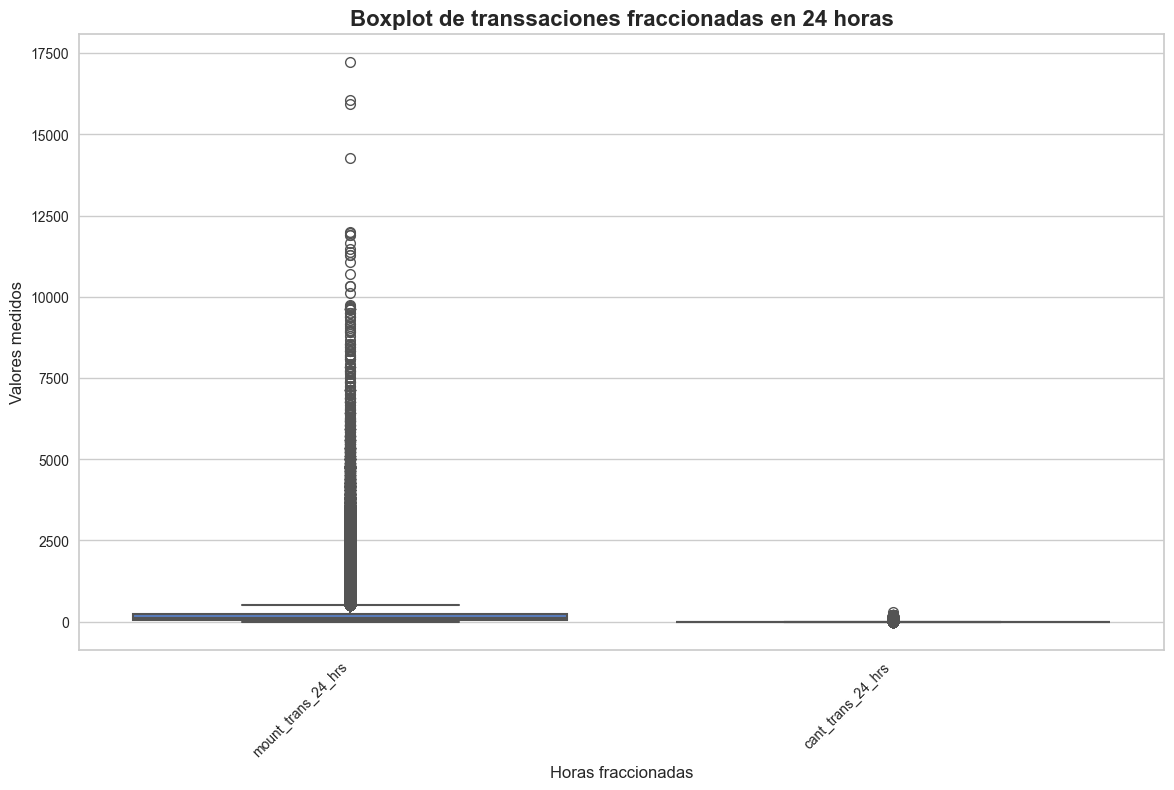

In [30]:
# Se seleccionan variables numéricas
train_numeric = df_fraccio_fn[['mount_trans_24_hrs','cant_trans_24_hrs']]

# Se Configura tamaño y estilo
plt.figure(figsize=(14, 8))
sns.set_style("whitegrid")

# Se realiza creación de Boxplot
sns.boxplot(data=train_numeric, palette="muted", linewidth=1.5)
plt.title("Boxplot de transsaciones fraccionadas en 24 horas", fontsize=16, fontweight='bold')
plt.xlabel("Horas fraccionadas", fontsize=12)
plt.ylabel("Valores medidos", fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.show()


Outliers en monto total en 24 horas y la cantidad de transacciones en 24 horas se debe gestionar con detalle y cuidado para evitar sesgos

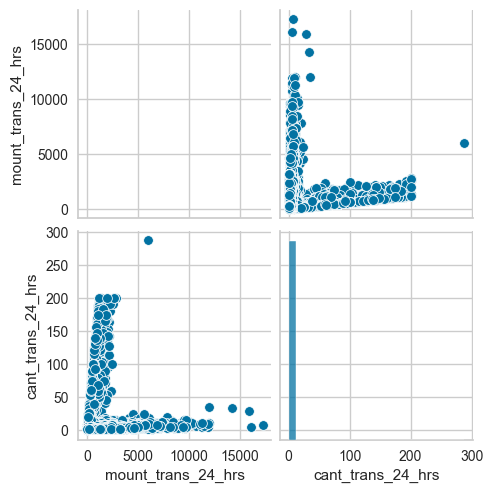

In [31]:
import seaborn as sns
sns.pairplot(df_fraccio_fn[['mount_trans_24_hrs','cant_trans_24_hrs']])

<Axes: xlabel='mount_trans_24_hrs', ylabel='Count'>

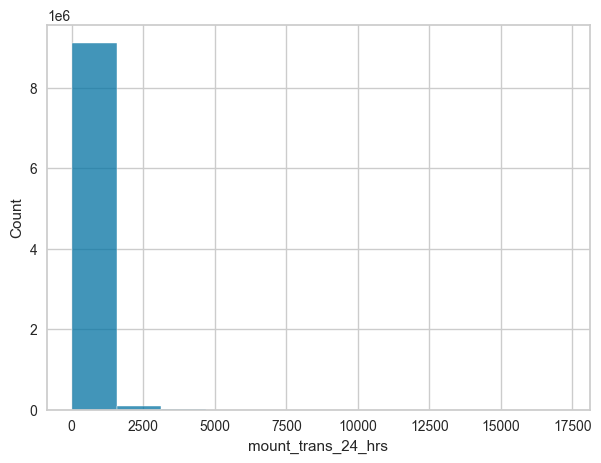

In [32]:
plt.figure(figsize=(7, 5))
sns.histplot(data=df_fraccio_fn, x='mount_trans_24_hrs', bins=11)

In [42]:
# # Rename numeric columns to text using a dictionary
# df_fraccio_fn = df_fraccio_fn.rename(columns={0: '0_h', 1: '1_h',2: '2_h', 3: '3_h',4: '4_h', 5: '5_h',6: '6_h', 7: '7_h',8: '8_h', 9: '9_h',10: '10_h', 11: '11_h',12: '12_h', 13: '13_h',14: '14_h', 15: '15_h',16: '16_h', 17: '17_h',18: '18_h', 19: '19_h',20: '20_h',21: '21_h', 22: '22_h', 23: '23_h'})

In [33]:
df_fraccio_fn.dtypes

hora
account_number         object
transac_fecha          object
0                     float64
1                     float64
2                     float64
3                     float64
4                     float64
5                     float64
6                     float64
7                     float64
8                     float64
9                     float64
10                    float64
11                    float64
12                    float64
13                    float64
14                    float64
15                    float64
16                    float64
17                    float64
18                    float64
19                    float64
20                    float64
21                    float64
22                    float64
23                    float64
mount_trans_24_hrs    float64
cant_trans_24_hrs     float64
dtype: object

#### Análisis de Correlación de variables

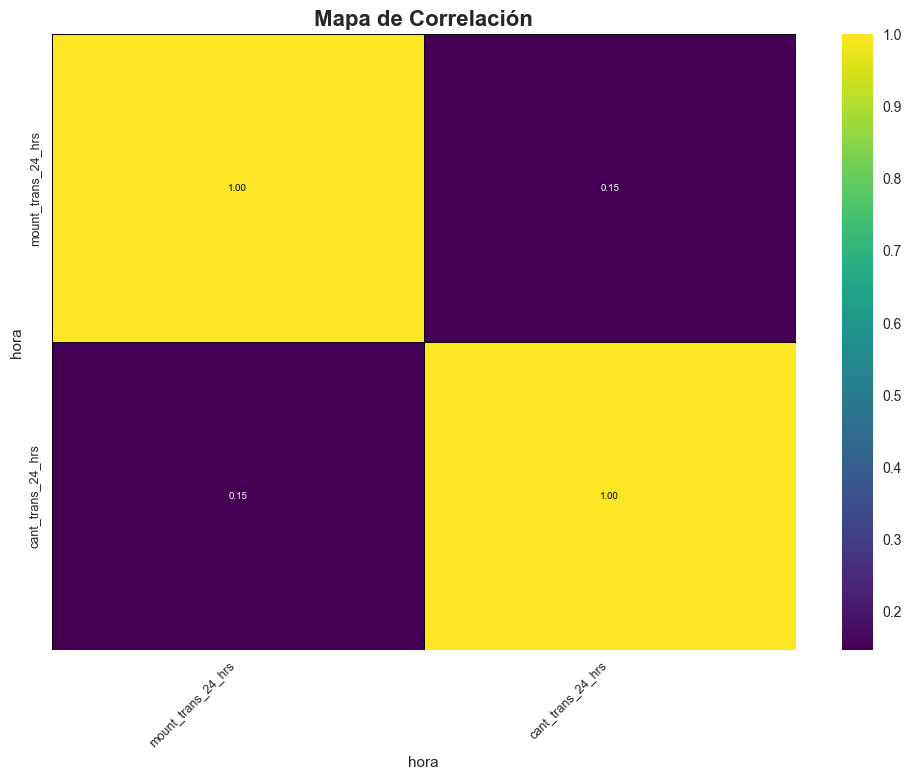

In [34]:
# Filtrar solo columnas numéricas y calcular la matriz de correlación
numeric_columns = df_fraccio_fn[['mount_trans_24_hrs','cant_trans_24_hrs']]
corr_matrix = numeric_columns.corr()

# Configurar el tamaño del gráfico
plt.figure(figsize=(12, 8))

# Crear el mapa de calor con la paleta 'viridis'
heatmap = sns.heatmap(
    corr_matrix,
    cmap='viridis',  # Paleta vibrante
    annot=True,
    fmt='.2f',
    linewidths=0.5,
    linecolor='black',
    cbar=True,
    annot_kws={"size": 7}  # Ajuste del tamaño del texto
)

# Ajustar el color del texto para mayor legibilidad
for text in heatmap.texts:
    val = float(text.get_text())
    text.set_color('white' if val < 0.5 else 'black')  # Texto blanco para valores bajos y negro para altos

# Añadir título y ajustes de ejes
plt.title('Mapa de Correlación', fontsize=16, fontweight='bold')
plt.xticks(rotation=45, ha='right', fontsize=9)
plt.yticks(fontsize=9)

# Mostrar el gráfico
plt.show()


### **Paso 3: Definir el modelo analítico.**

#### 3.1 Detección de anomalias para definir el umbral

In [35]:
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.covariance import EllipticEnvelope
#from pyemma import msm # not available on Kaggle Kernel
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM

### Metodo 1:  isolation forest

In [36]:
df_fraccio_fn.to_parquet("./df_fraccio_fn.parquet")

In [37]:
outliers_fraction = 0.01
# Take useful feature and standardize them 
data = df_fraccio_fn[['mount_trans_24_hrs','cant_trans_24_hrs']]
min_max_scaler = preprocessing.StandardScaler()
np_scaled = min_max_scaler.fit_transform(data)
data = pd.DataFrame(np_scaled)
# train isolation forest 
model =  IsolationForest(contamination = outliers_fraction)
model.fit(data)

IsolationForest(contamination=0.01)

In [ ]:
# # Take useful feature and standardize them 
# data = df_fraccio_fn[['mount_trans_24_hrs','cant_trans_24_hrs']]
# min_max_scaler = preprocessing.StandardScaler()
# np_scaled = min_max_scaler.fit_transform(data)
# data = pd.DataFrame(np_scaled)
# # train isolation forest 
# model =  IsolationForest(n_estimators  = 1000,
#                 max_samples   ='auto',
#                 contamination = 0.01,
#                 n_jobs        = -1,
#                 random_state  = 123)
# model.fit(data)

In [39]:
# add the data to the main  
df_fraccio_fn['anomalia'] = pd.Series(model.predict(data))
df_fraccio_fn['anomalia'] = df_fraccio_fn['anomalia'].map( {1: 0, -1: 1} )
print(df_fraccio_fn['anomalia'].value_counts())
print()
df_fraccio_fn.head()

anomalia
0    9122368
1      92072
Name: count, dtype: int64



hora,account_number,transac_fecha,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,mount_trans_24_hrs,cant_trans_24_hrs,anomalia
0,00000f81a1d5583a06a5cb7f4a1cbc0e,2021-11-28,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,59.44455,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,59.44455,1.00000,0
1,000011b29a455d40b5aea0cfca1aa7f6,2021-04-28,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,11.88891,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,11.88891,1.00000,0
2,000011b29a455d40b5aea0cfca1aa7f6,2021-05-26,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,107.00019,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,107.00019,1.00000,0
3,000011b29a455d40b5aea0cfca1aa7f6,2021-05-28,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,178.33365,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,178.33365,1.00000,0
4,000011b29a455d40b5aea0cfca1aa7f6,2021-06-02,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,118.88910,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,118.88910,1.00000,0


In [40]:
print(df_fraccio_fn['anomalia'].value_counts(dropna=False))
print()
print(df_fraccio_fn['anomalia'].value_counts(True,dropna=False)*100)

anomalia
0    9122368
1      92072
Name: count, dtype: int64

anomalia
0   99.00079
1    0.99921
Name: proportion, dtype: float64


### Perfil transacciones por fraccionamiento con anomalias

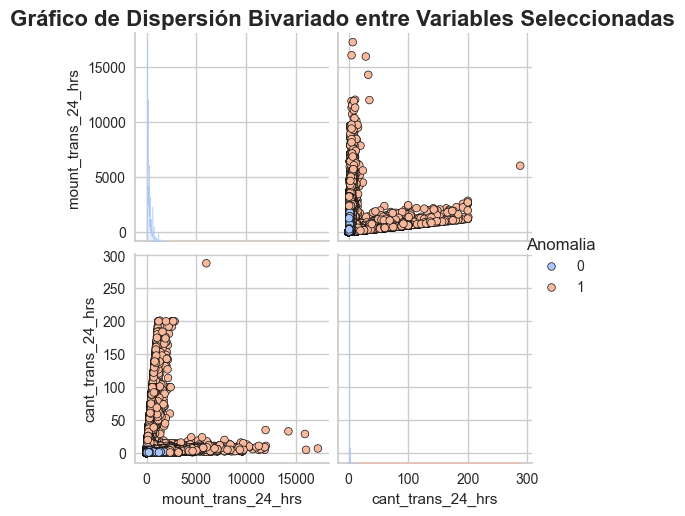

In [42]:
# Selección de las variables para el gráfico bivariado
variables = ['mount_trans_24_hrs', 'cant_trans_24_hrs']

# Crear PairPlot con las variables seleccionadas
g = sns.pairplot(
    data=df_fraccio_fn,
    vars=variables,
    hue='anomalia',
    palette='coolwarm',
    diag_kind='kde',
    plot_kws={'s': 30, 'edgecolor': 'k', 'linewidth': 0.5}
)


# Ajustes del título
g.fig.suptitle('Gráfico de Dispersión Bivariado entre Variables Seleccionadas',
               fontsize=16, fontweight='bold', y=1.02)

# Ajustar la posición de la leyenda para evitar solapamientos
g._legend.set_title("Anomalia")
g._legend.set_bbox_to_anchor((1.05, 0.5))

# Mostrar el gráfico
plt.show()

In [ ]:
resumen= pd.DataFrame(df_fraccio_fn[['mount_trans_24_hrs','cant_trans_24_hrs','anomalia']].groupby(['anomalia']).mean()).reset_index()
resumen

hora,anomalia,mount_trans_24_hrs,cant_trans_24_hrs
0,0,203.09291,1.10873
1,1,2185.57763,6.45584


In [51]:
# Análisis estadístico
print("Resumen estadístico de las variables numéricas:")
display(df_fraccio_fn[df_fraccio_fn['anomalia']==1][['mount_trans_24_hrs','cant_trans_24_hrs','anomalia']].describe(include='all'))

Resumen estadístico de las variables numéricas:


hora,mount_trans_24_hrs,cant_trans_24_hrs,anomalia
count,92072.00000,92072.00000,92072.00000
mean,2185.57763,6.45584,1.00000
std,885.86282,14.50078,0.00000
min,41.61119,1.00000,1.00000
25%,1783.33650,2.00000,1.00000
50%,2282.67072,3.00000,1.00000
75%,2615.56021,4.00000,1.00000
max,17238.91954,288.00000,1.00000


### Por el método de isolation forest se identifica un umbral para la identrificación de transacciones fraccionadas en una ventana de tiempo de 24 horas, cantidad de transacciones mayores o iguales a 6 y un monto total mayor o igual a $2185.6

### Conclusiones:

* Se crea base de conocimiento df_fraccio_fn, donde se crean variables como 'mount_trans_24_hrs','cant_trans_24_hrs' que concentran el fraccionamiento de las transacciones en una ventana de 24 horas.

* Aplicando Metodos de Detección de Anomalias como IsolationForest y una contamination = 0.01, se Identifica las transacciones fracturadas en una ventana de tiempo de 24 horas inusuales, donde se ve un perfil inusual y se define unos umbrales para considerar la transacciones fraccionada en una ventana de tiempo de 24 horas, cantidad de transacciones mayores o iguales a 6 y un monto total mayor o igual a $2185.6.

## Fin

-------